# Dataset analysis

In this notebook, I'll explore the tweets dataset obtained from Kaggle.

## Import libraries

I'll import `pandas` to read the .csv file and create a dataframe of the same. I'll use `matplotlib` to visualize the data. I import `WordCloud` and `STOPWORDS` to create a word cloud for the raw dataset. For some reason, `wordcloud` installed using pip is not recognizable here, so I install it in the notebook itself. I'll also filter out any deprecation warnings.

In [ ]:
#!pip install wordcloud

In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)

## Read dataset

I'll now import the dataset and then get information about the dataset. Given that the dataset has no headers included, I'll define the column labels as well.

In [3]:
dataset = pd.read_csv('C://Users/44740/Machine learning/glastonbury/BL/BL/glastonbury_BL_improved.csv', names = ['Sentiment', 'Id', 'Time', 'ScreenName', 'hashtags', 'Tweets'])

There are a total of 6 columns in the dataset.

In [4]:
print("Total tweets in the dataset: {} Thousands".format(dataset.shape[0]))

Total tweets in the dataset: 123532 Thousands


As defined in the description of the dataset, there are 1.6 million tweets. I'll also get more information about the dataset using the `info` method.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123532 entries, 0 to 123531
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sentiment   123532 non-null  int64  
 1   Id          123532 non-null  float64
 2   Time        123532 non-null  object 
 3   ScreenName  123532 non-null  object 
 4   hashtags    123532 non-null  object 
 5   Tweets      123532 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.7+ MB


There seem to be no missing values for any column. Two columns (Sentiment and Id) are of int64 type while the rest four are objects. Date should ideally be read as date type.

## Column analysis

I'll take a look at each columns and identify the columns that'll be useful.

### Sentiment

Let's see how the dataset is distributed between the positive and negative sentiment values. I'll plot a bar chart with negative tweets in red and positive tweets in green.

No handles with labels found to put in legend.


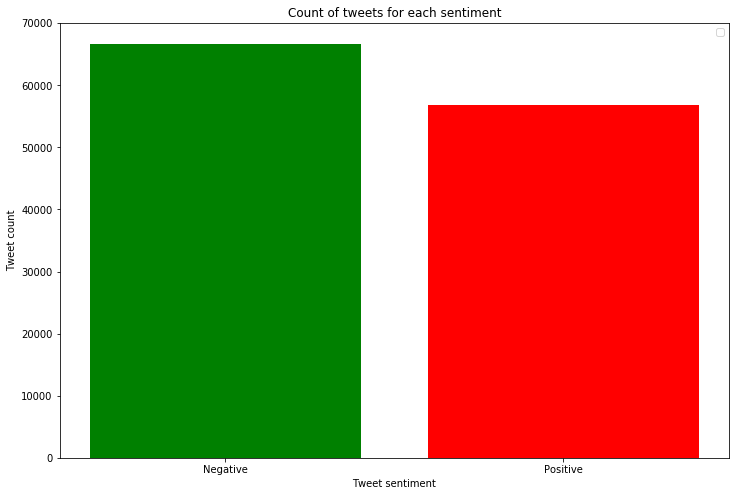

In [7]:
class_count = dataset['Sentiment'].value_counts() # Returned in descending order [1, 0]
plt.figure(figsize = (12, 8))
plt.xticks([1, 0], ['Positive', 'Negative'])
plt.xticks([1, 0])
plt.bar(x = class_count.keys(), 
        height = class_count.values, 
        color = ['g', 'r'])
plt.xlabel("Tweet sentiment")
plt.ylabel("Tweet count")
plt.title("Count of tweets for each sentiment")
plt.legend()

The dataset is evenly distributed between positive (4) and negative (0) tweets.

### Date

Date is an important feature if I wish to take a look at the tweets based on dates. I'll extract the month from each tweet and then plot the count of tweets for each month.

In [8]:
dataset['Month'] = dataset['Time'].apply(lambda date: date.split(' ')[2])
months_count = dataset['Month'].value_counts()

Text(0.5, 1.0, 'Tweets during months of 2013')

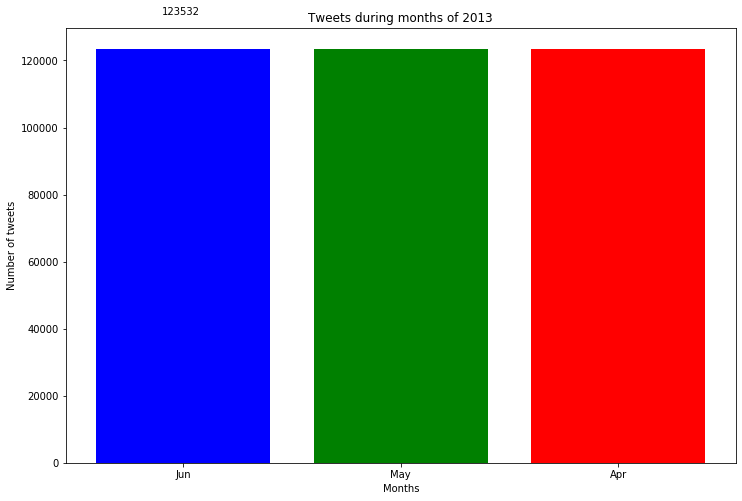

In [9]:
plt.figure(figsize = (12, 8))
plt.bar(['Jun', 'May', 'Apr'], months_count.values, color = ['b', 'g', 'r'])
for i, v in enumerate(months_count.values):
    plt.text(i - 0.1, v + 10000, str(v))
plt.xlabel('Months')
plt.ylabel('Number of tweets')
plt.title('Tweets during months of 2013')

As we can see, the maximum tweets were grabbed in the June 2009.

### Id, Flag and User

I won't use the `Id`, `Flag` or the `User` information during sentiment analysis and I can simply drop these columns.

### Tweet

Let's also take a look at the tweets. I'll print the first two tweets.

In [11]:
print(dataset['Tweets'][0])
print(dataset['Tweets'][1])

RT @PeteMcKee: God like genius award goes to @matthelders for the 0114 Sheffield area code on his drums #glastonbury
RT @cfegan17: fuck the artic monkeys are some band! #unreal #glastonbury


It appears that there are a lot of elements in the tweets that we can take a look at. There are usernames, urls, emoticons, extra dots, exclamation marks and many others. I'll combine all tweets based on their sentiment and create their respective wordclouds.

In [13]:
positive_tweets = ' '.join(dataset[dataset['Sentiment'] == 1]['Tweets'].str.lower())
negative_tweets = ' '.join(dataset[dataset['Sentiment'] == 0]['Tweets'].str.lower())

Text(0.5, 1.0, 'Positive tweets Wordcloud')

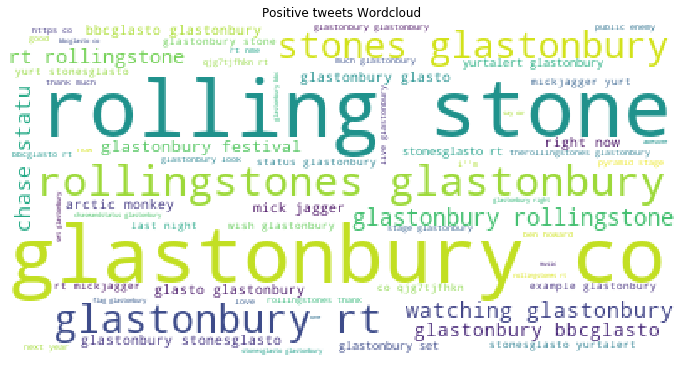

In [14]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(positive_tweets)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Positive tweets Wordcloud")

Text(0.5, 1.0, 'Negative tweets Wordcloud')

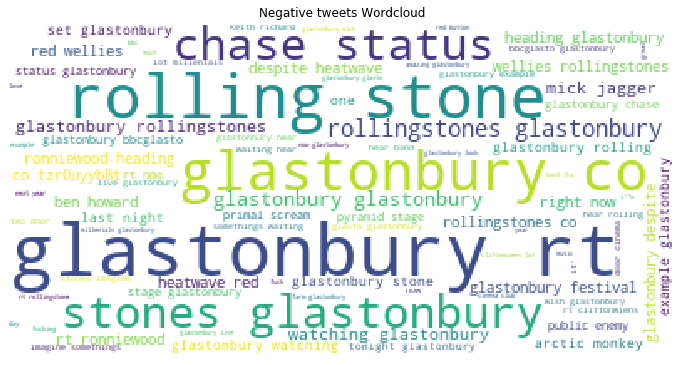

In [15]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(negative_tweets)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Negative tweets Wordcloud")

From the word clouds above, it appears that the top words for each tweet sentiment are very similar such as **lol**, and **quot**. We will need to create a neural network that can classify the sentiments even with such high similarity of words.